In [3]:
# (1) Importing dependency
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
np.random.seed(1000)

Using TensorFlow backend.


# AlexNet Architecture

In [2]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(23))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [4]:
train_dir = 'Dataset/train'
test_dir = 'Dataset/final'
validation_dir = 'Dataset/test'
small_test_dir = 'Dataset/small'

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(224, 224),
                    batch_size=32,
                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(224, 224),
                        batch_size=32,
                        class_mode='categorical')
datagen = ImageDataGenerator(rescale=1./255)
test=datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
       class_mode='categorical')

Found 35247 images belonging to 23 classes.
Found 8679 images belonging to 23 classes.
Found 1150 images belonging to 23 classes.
Found 441 images belonging to 23 classes.


In [7]:

from keras import optimizers
sgd = optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd,
                  metrics=['accuracy'])

In [8]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0,
                                  mode='min')


ckpt = ModelCheckpoint('alexNet_model.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                       patience=7, verbose=1, epsilon=1e-4,
                                       mode='min')

In [ ]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=50,
                callbacks=[earlyStopping, ckpt, reduce_lr_loss],
                validation_data=validation_generator,
                validation_steps=50)

Epoch 1/50
  3/100 [..............................] - ETA: 1240s - loss: 0.2109 - acc: 0.9511

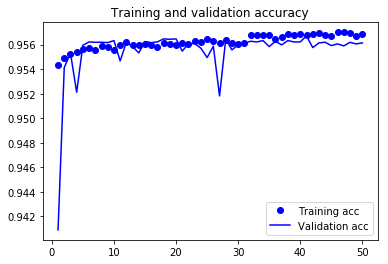

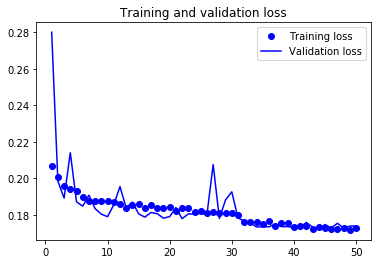

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:

final=datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=16,
       class_mode='categorical')

Found 1150 images belonging to 23 classes.


In [16]:
#test model accurcy in new images 
test_accuracy=model.evaluate_generator(final,1150)

In [17]:
print("Accuracy = ", test_accuracy[1]*100)

Accuracy =  95.7241254996267


In [24]:
small=datagen.flow_from_directory(
        small_test_dir,
        target_size=(224, 224),
        batch_size=4,
       class_mode='categorical')

Found 9 images belonging to 23 classes.


In [11]:
from keras.models import load_model
model = load_model('alexNet_model.hdf5')


In [25]:
small_accu=model.evaluate_generator(small,9)

In [26]:
print("Accuracy = ", small_accu[1]*100)

Accuracy =  95.652174949646


In [20]:
print("Accuracy = ", small_accu)

Accuracy =  [0.16092423763540056, 0.95652174949646]


In [28]:
small2_accu=model.predict_generator(small,9)

In [29]:
small2_accu

array([[0.07209311, 0.02517702, 0.05759764, 0.05128996, 0.0573752 ,
        0.03322944, 0.03008461, 0.00045361, 0.03902106, 0.05600887,
        0.03437084, 0.01088195, 0.03665542, 0.02228352, 0.06234821,
        0.13087623, 0.01853208, 0.00994488, 0.07431281, 0.0174412 ,
        0.01650921, 0.02067587, 0.12283715],
       [0.02483585, 0.02462143, 0.02541735, 0.12008319, 0.01821576,
        0.01135749, 0.00870824, 0.00274485, 0.00952246, 0.03150262,
        0.01394657, 0.00517545, 0.34642756, 0.01915795, 0.02411503,
        0.10000824, 0.01106375, 0.06711287, 0.0418241 , 0.00703943,
        0.01584114, 0.03617539, 0.03510339],
       [0.06824267, 0.02165031, 0.05596528, 0.03784616, 0.05707651,
        0.06875688, 0.02653984, 0.00496388, 0.12413204, 0.0724766 ,
        0.07896826, 0.00631288, 0.0117633 , 0.0534607 , 0.07571019,
        0.0308804 , 0.0129467 , 0.0218916 , 0.05529716, 0.02523788,
        0.03256421, 0.02823246, 0.02908416],
       [0.06888437, 0.01046024, 0.06032619, 0.065